## Exploring larval _Drosophila_ anemotaxis behavioural data
Written by Sharbat based on Timothee, with help from GitHub Copilot, 2025

In [4]:
import pandas as pd
import os
import re
from matplotlib import cm 
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np
import itertools
import src.parse_data as anm_parse
import src.plot_data as anm_plot
import json
plt.style.use('../anemotaxis.mplstyle')

In [5]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_folder = "/mnt/c/Users/schatterjee/Documents/anemotaxis/data/20240219_140808/"
columns = ["time","id","persistence","speed","midline","loc_x","loc_y","vel_x","vel_y","orient","pathlen"]
larvae_data = anm_parse.extract_all_larvae(data_folder, columns)

In [21]:
from pprint import pprint
larva_id = '30.00003'
# Accessing metadata, data, and summary for larva "30.00001"
pprint(larvae_data[larva_id]["metadata"])  # Experiment details
# pprint(larvae_data["30.00001"]["data"])     # Extracted raw data (commented out)
pprint(larvae_data[larva_id]["summary"])   # Summary statistics

{'date': '20240219_140808',
 'effector': 'UAS_TNT_2_0003',
 'genotype': 'GMR_SS01948',
 'interval_between_repetitions': '0s',
 'number_of_repetitions': 1,
 'prestimulus_duration': '2s',
 'raw_protocol': 'p_5gradient2_2s1x600s0s#n#n#n',
 'stimulus_duration': '600s',
 'stimulus_specifications': '5gradient2',
 'stimulus_type': 'p',
 'tracker': 't7'}
{'id': {'max': np.int64(3),
        'mean': np.float64(3.0),
        'min': np.int64(3),
        'size': 7018},
 'loc_x': {'max': np.float64(100.933),
           'mean': np.float64(84.45570376175549),
           'min': np.float64(70.64),
           'size': 7018},
 'loc_y': {'max': np.float64(59.064),
           'mean': np.float64(49.02224052436592),
           'min': np.float64(40.772),
           'size': 7018},
 'midline': {'max': np.float64(3.649),
             'mean': np.float64(2.886125819321744),
             'min': np.float64(1.375),
             'size': 7018},
 'orient': {'max': np.float64(179.9),
            'mean': np.float64(0.196152

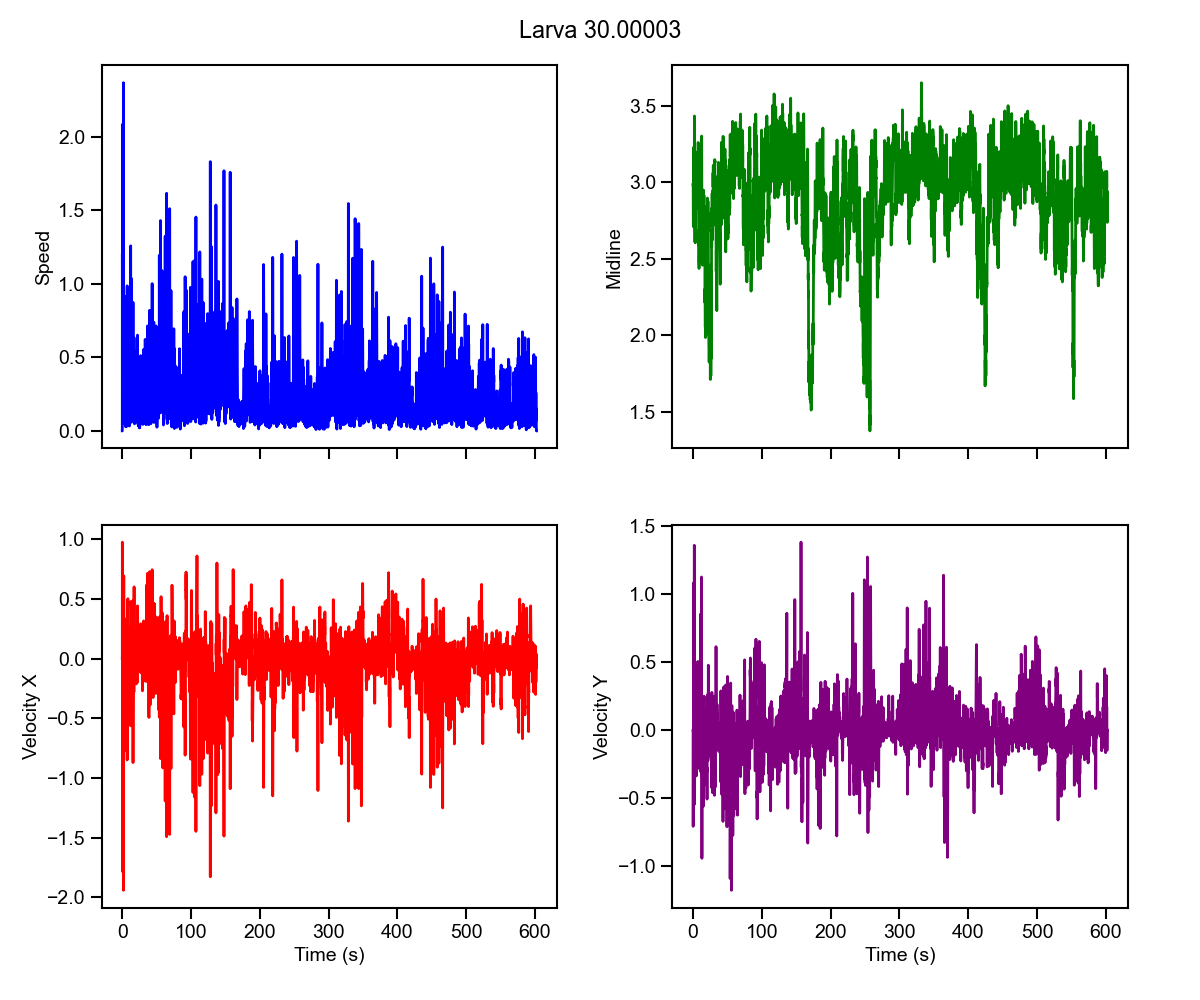

In [22]:
anm_plot.plot_larva_data(larvae_data[larva_id]['data'], larva_id)

In [23]:
larva_id = '30.00001'

FloatSlider(value=0.007, description='Time', layout=Layout(width='800px'), max=602.17, min=0.007, step=0.08580…

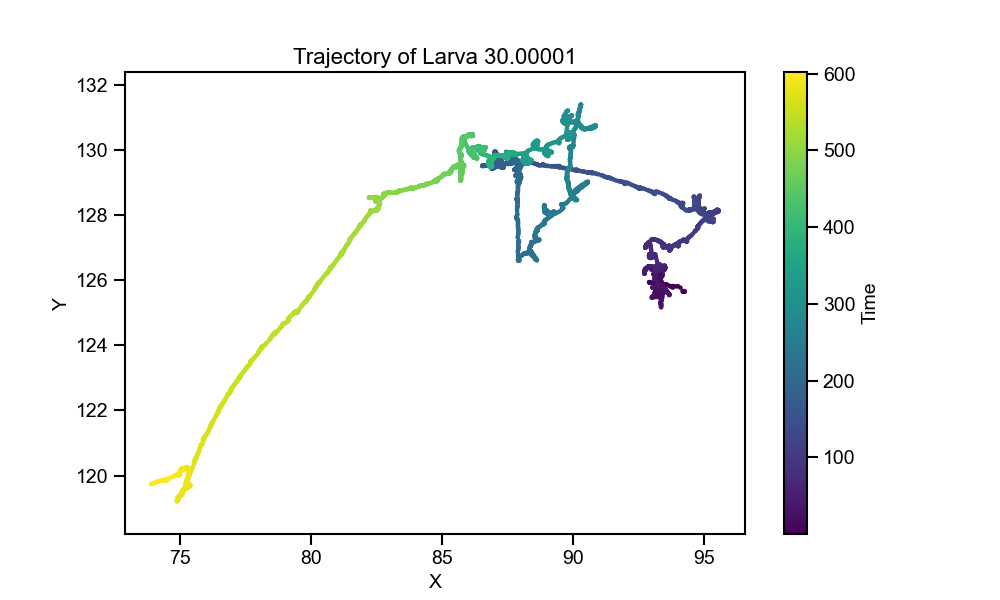

In [24]:
anm_plot.plot_trajectory_2d_interactive(larvae_data[larva_id]["data"], larva_id)

### Calculate clusters (k-means) on dimension-reduced behaviour data

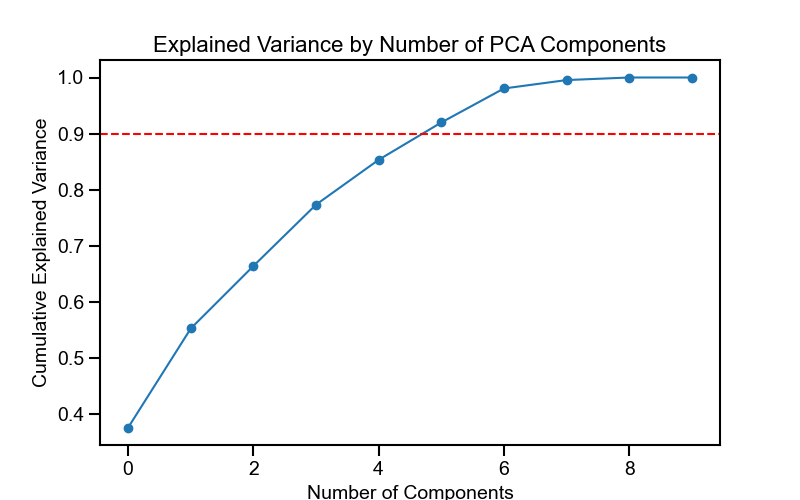

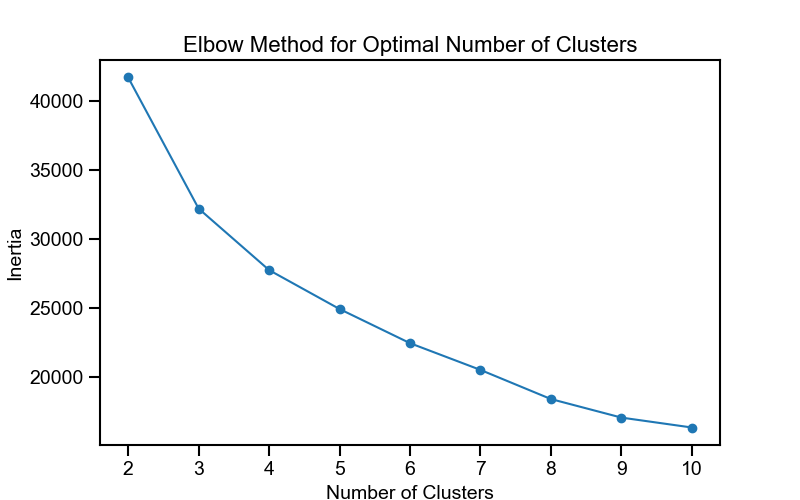

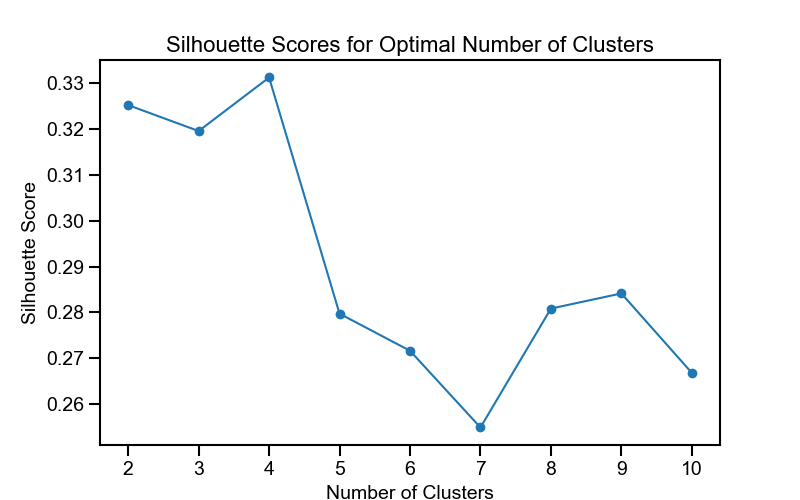

Optimal number of PCA components: 6
Optimal number of clusters: 4


In [25]:
clustered_data, optimal_components, optimal_clusters = anm_parse.cluster_behaviors(larvae_data[larva_id]["data"], variance_threshold=0.90, max_clusters=10)
print(f'Optimal number of PCA components: {optimal_components}')
print(f'Optimal number of clusters: {optimal_clusters}')

In [26]:
clustered_data

time  persistence  speed  midline   loc_x    loc_y  vel_x  vel_y  \
0       0.007        602.2  0.000    3.130  94.210  125.643  0.000  0.000   
1       0.062        602.2  0.000    3.088  94.219  125.655  0.000  0.000   
2       0.116        602.2  0.247    2.972  94.186  125.654  0.247  0.015   
3       0.171        602.2  0.384    3.032  94.252  125.649  0.382 -0.034   
4       0.226        602.2  0.231    2.972  94.262  125.647  0.229  0.028   
...       ...          ...    ...      ...     ...      ...    ...    ...   
7013  601.811        602.2  0.504    3.273  74.054  119.782 -0.478 -0.158   
7014  601.901        602.2  0.558    3.392  74.004  119.768 -0.539 -0.143   
7015  601.989        602.2  0.000    3.317  73.959  119.757  0.000  0.000   
7016  602.076        602.2  0.000    3.289  73.895  119.742  0.000  0.000   
7017  602.170        602.2  0.000    3.281  73.912  119.741  0.000  0.000   

      orient  pathlen  cluster     pca_1     pca_2     pca_3     pca_4  \
0      173.6    0.000        2  2.662935  0.445205 -0.180521 -0.829590   
1      173.2    0.000        2  2.686698  0.390985 -0.220193 -0.817779   
2      173.3    0.000        2  2.920024  0.569611  0.073767 -1.668280   
3      173.8    0.000        2  2.921890  0.872629  0.055262 -2.052598   
4      174.1    0.000        2  2.933485  0.547240  0.118974 -1.632565   
...      ...      ...      ...       ...       ...       ...       ...   
7013  -168.8   25.948        1 -5.066866  2.967738 -0.773049 -0.746400   
7014  -169.2   25.948        1 -5.150930  3.507885 -0.633360 -0.709129   
7015  -169.4   25.948        1 -4.706401 -0.574287  0.435362 -1.760770   
7016  -169.5   25.948        1 -4.699459 -0.609546  0.408290 -1.758904   
7017  -169.3   25.948        1 -4.693041 -0.619058  0.401188 -1.756587   

         pca_5     pca_6  
0     0.741830  1.661111  
1     0.687024  1.674863  
2     1.404118  1.089870  
3     2.157394  0.746921  
4     1.294696  1.129496  
...        ...       ...  
7013 -1.312138  0.690266  
7014 -1.427280  0.559032  
7015 -0.126019  1.274720  
7016 -0.164449  1.290958  
7017 -0.174233  1.295845  

[7018 rows x 17 columns]

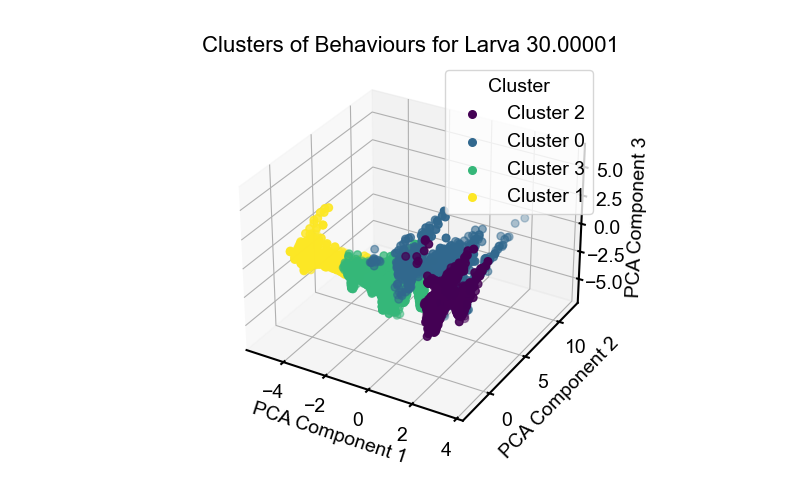

In [27]:
anm_plot.plot_clusters(clustered_data, larva_id, n_components=3)

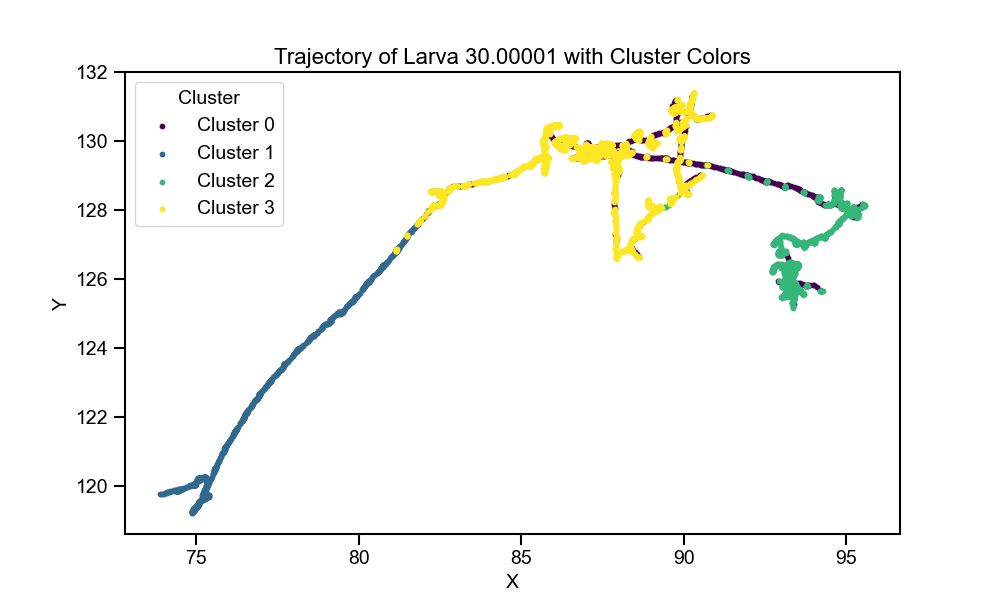

In [28]:
anm_plot.plot_trajectory_with_clusters(larvae_data[larva_id]["data"], clustered_data, larva_id)

### Calculating the navigational index
Check the code in `parse_data.py`

In [29]:
ni_dict = anm_parse.compute_navigational_index(larvae_data, ax="x")
for larva_id, ni in ni_dict.items():
    print(f"Larva {larva_id} - Navigational Index: {ni['NI_mean']}, Normalized Navigational Index: {ni['NI_norm']}")

Larva 30.00001 - Navigational Index: 0      -0.19066
1      -0.19066
2      -0.19066
3      -0.19066
4      -0.19066
         ...   
7013   -0.19066
7014   -0.19066
7015   -0.19066
7016   -0.19066
7017   -0.19066
Name: NI_mean, Length: 7018, dtype: float64, Normalized Navigational Index: 0      -0.19066
1      -0.19066
2      -0.19066
3      -0.19066
4      -0.19066
         ...   
7013   -0.19066
7014   -0.19066
7015   -0.19066
7016   -0.19066
7017   -0.19066
Name: NI_norm, Length: 7018, dtype: float64
Larva 30.00002 - Navigational Index: 0      -0.297088
1      -0.297088
2      -0.297088
3      -0.297088
4      -0.297088
          ...   
7013   -0.297088
7014   -0.297088
7015   -0.297088
7016   -0.297088
7017   -0.297088
Name: NI_mean, Length: 7018, dtype: float64, Normalized Navigational Index: 0      -0.297088
1      -0.297088
2      -0.297088
3      -0.297088
4      -0.297088
          ...   
7013   -0.297088
7014   -0.297088
7015   -0.297088
7016   -0.297088
7017   -0.297088
Name

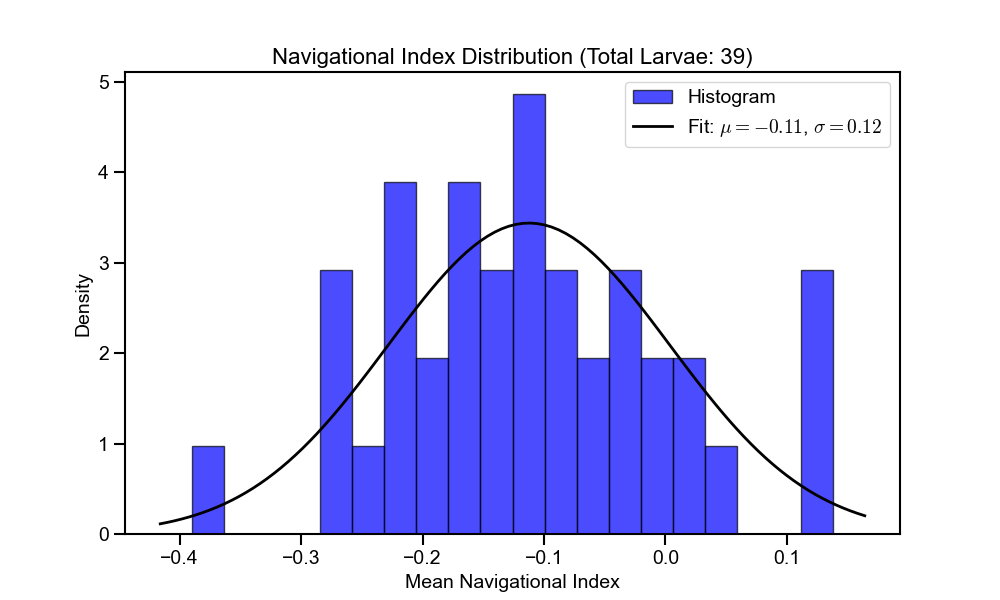

Mean Navigational Index: -0.11
Standard Deviation of Navigational Index: 0.12


In [86]:
anm_plot.plot_navigational_index_histogram(ni_dict, bins=20, density=True, fit_distribution=True)

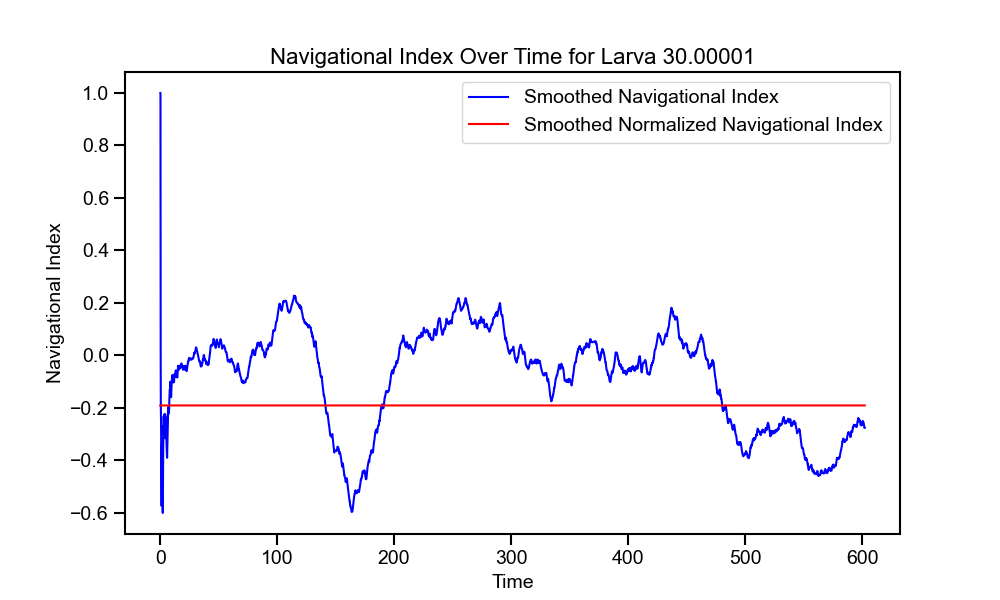

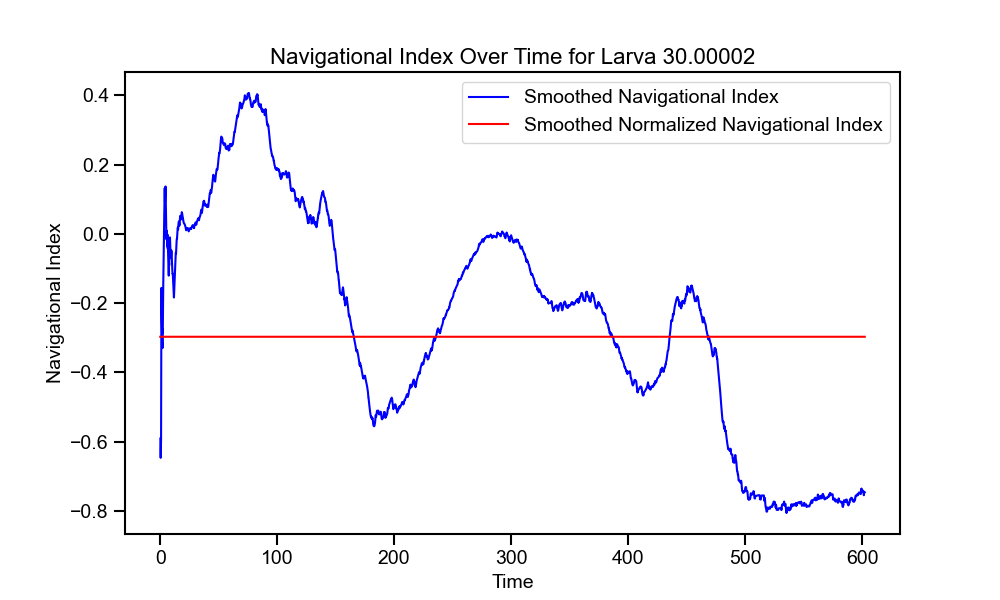

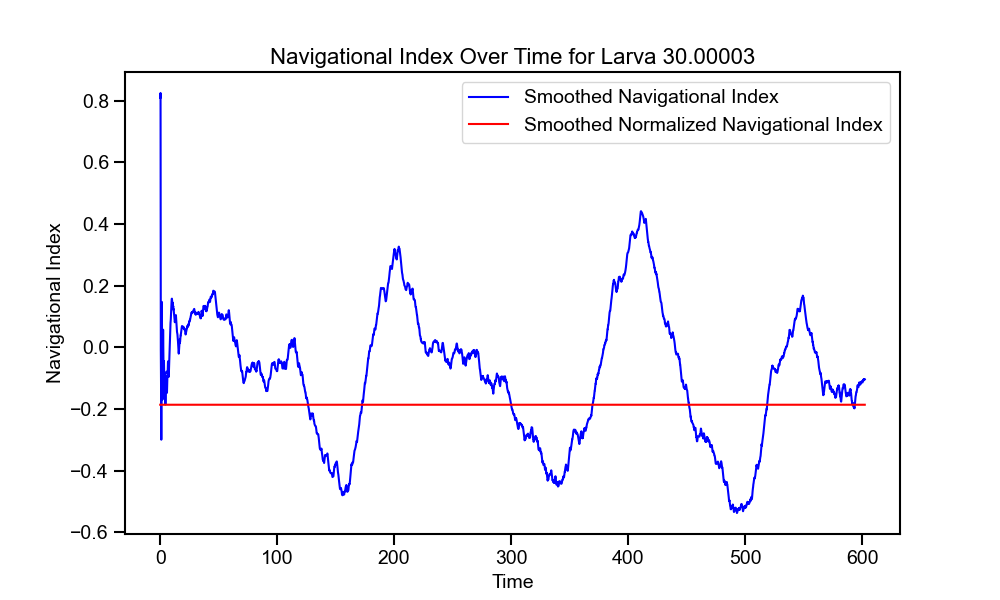

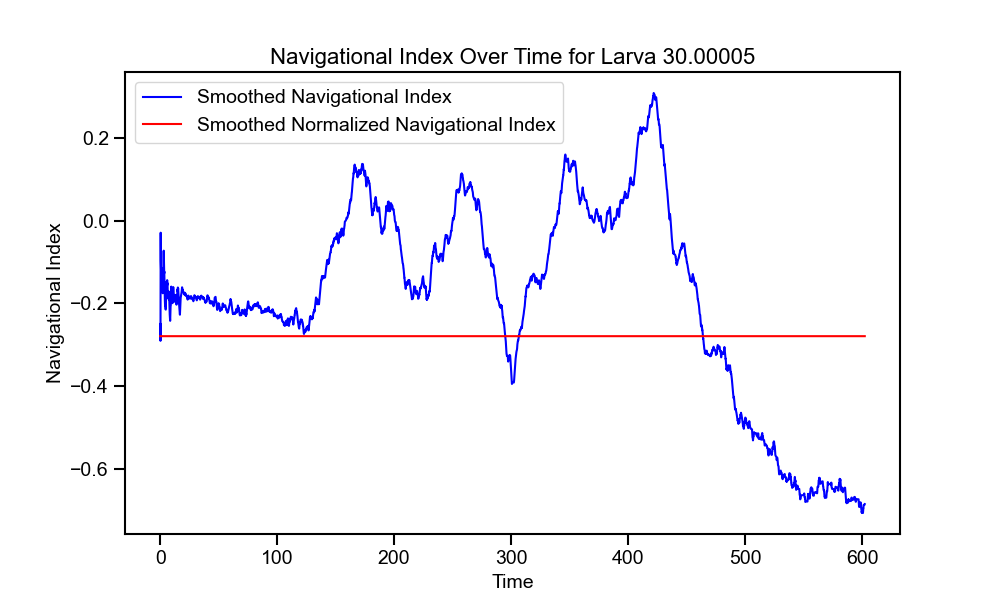

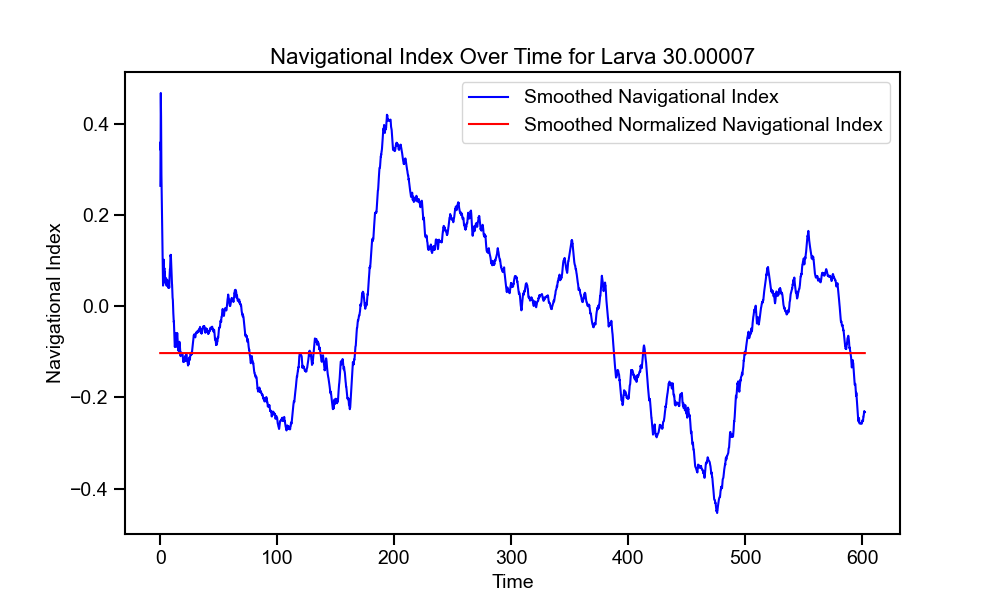

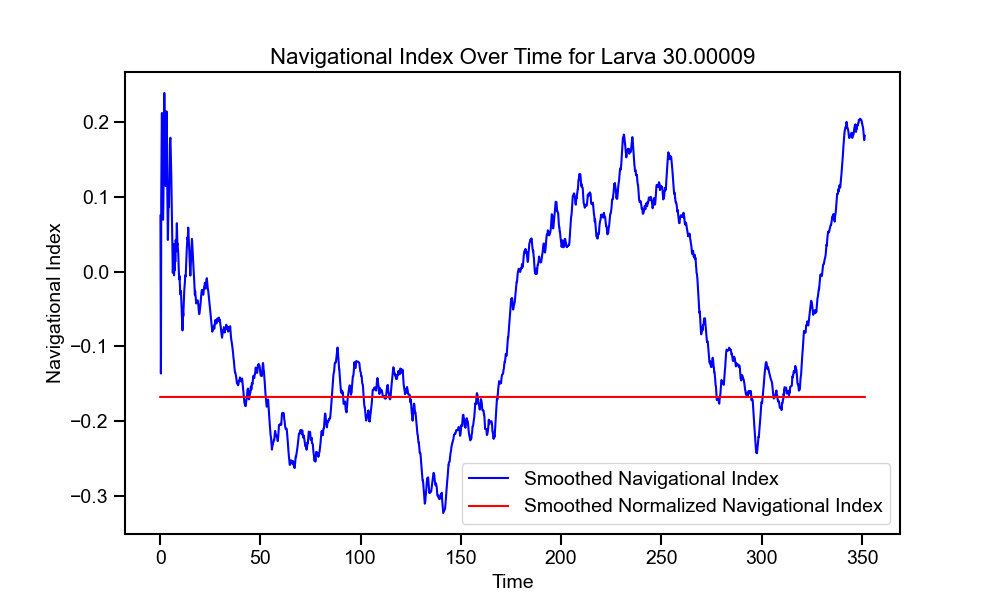

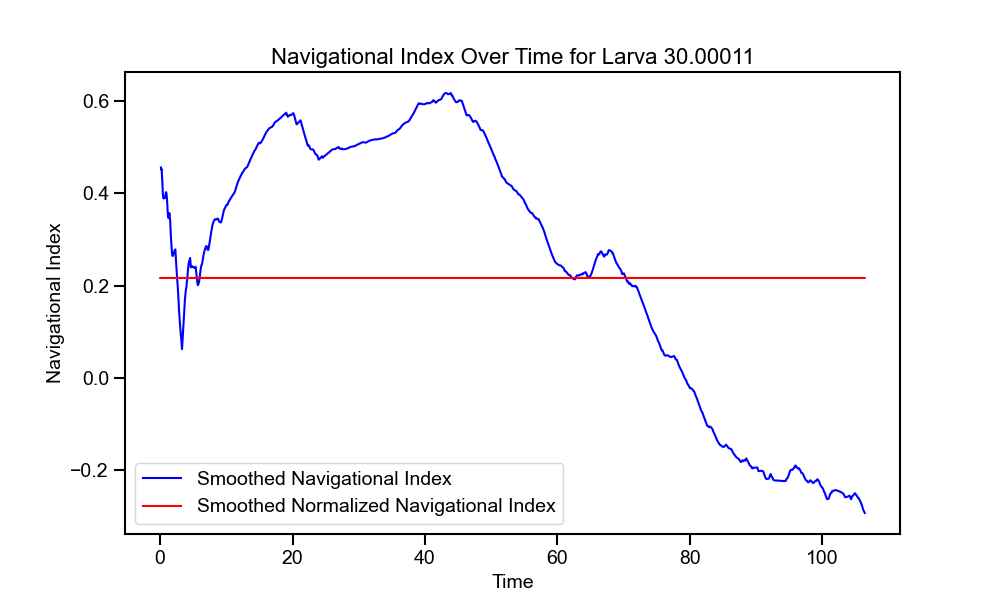

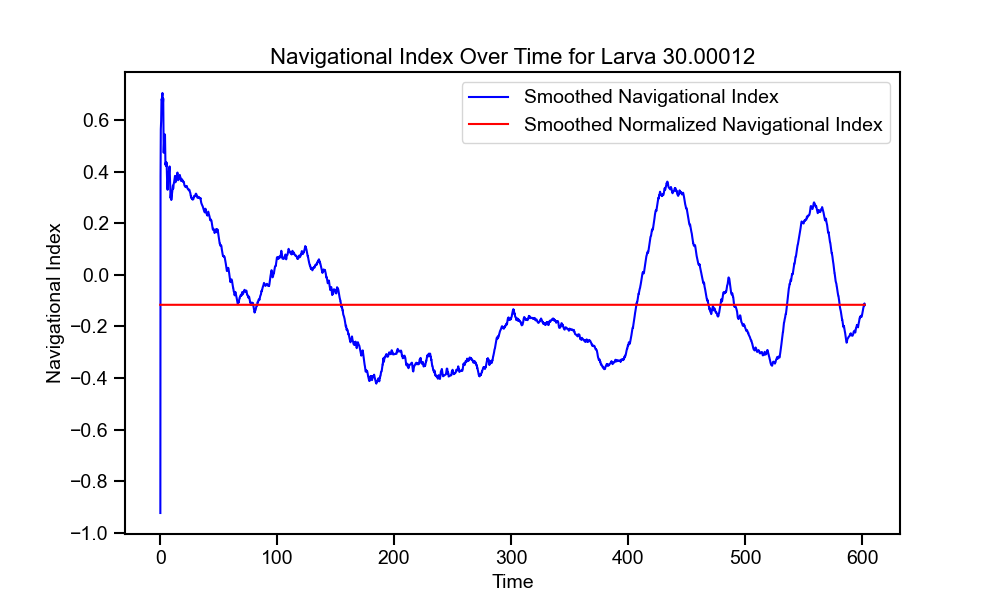

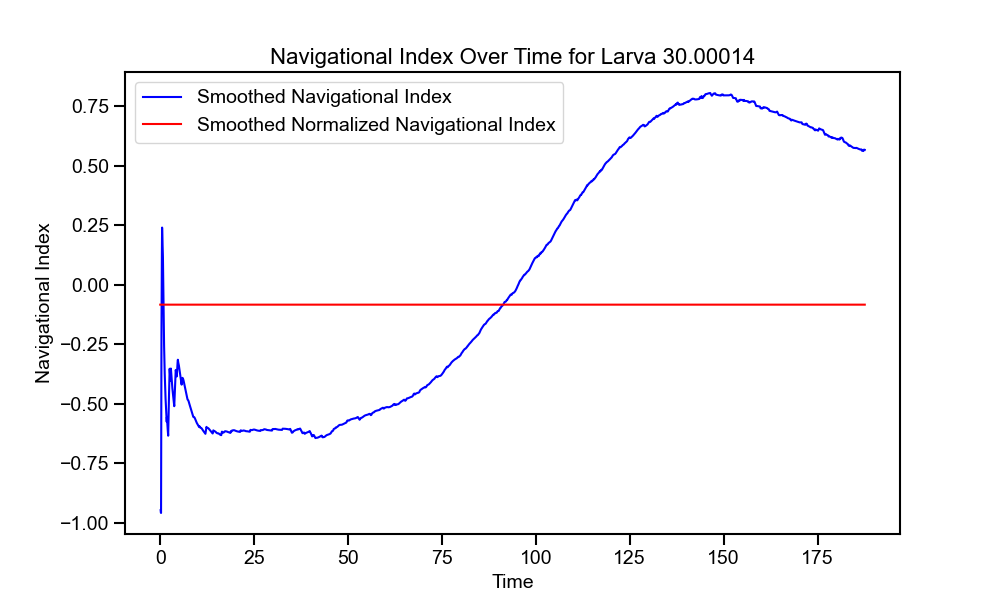

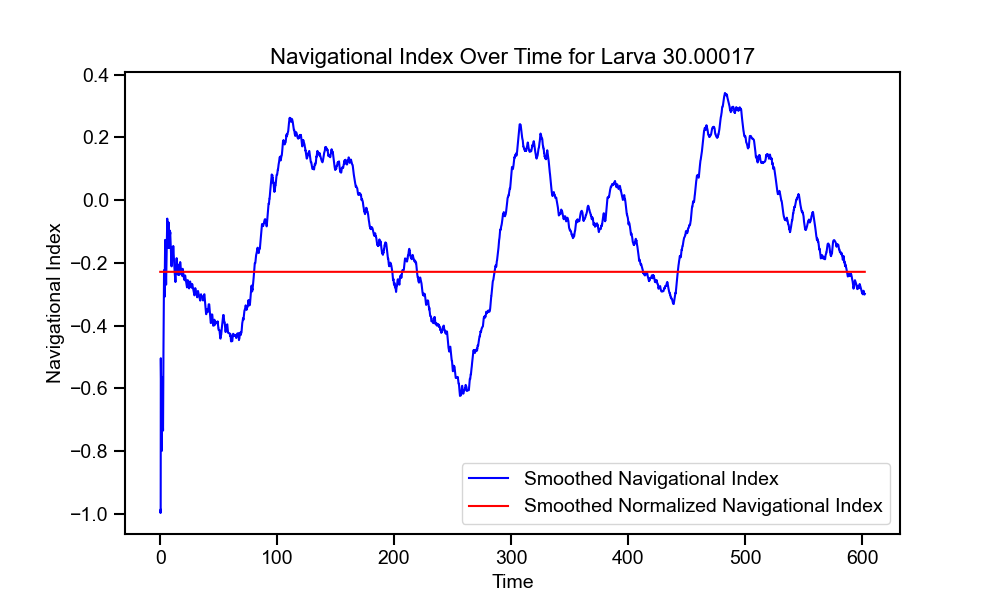

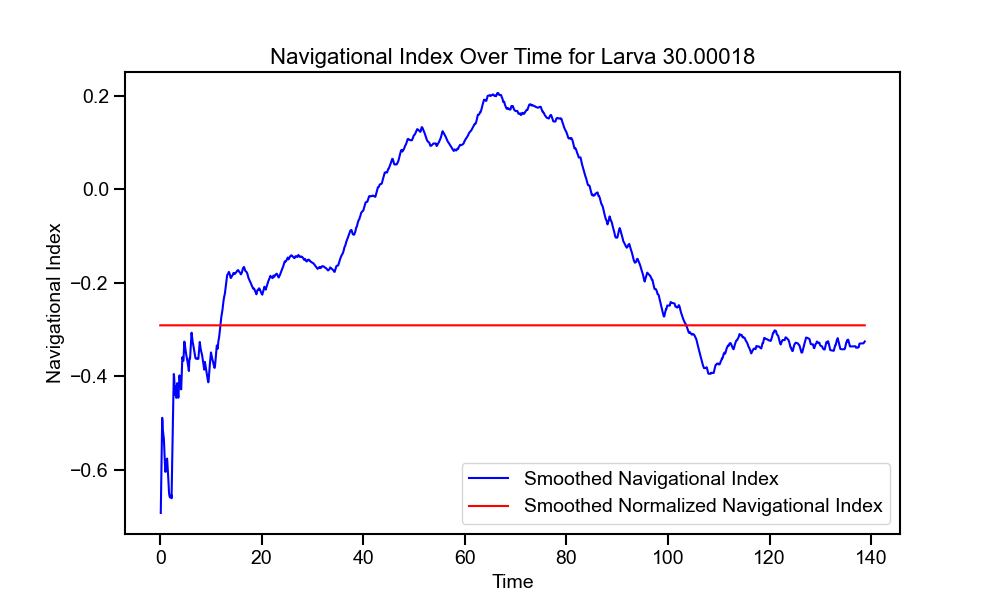

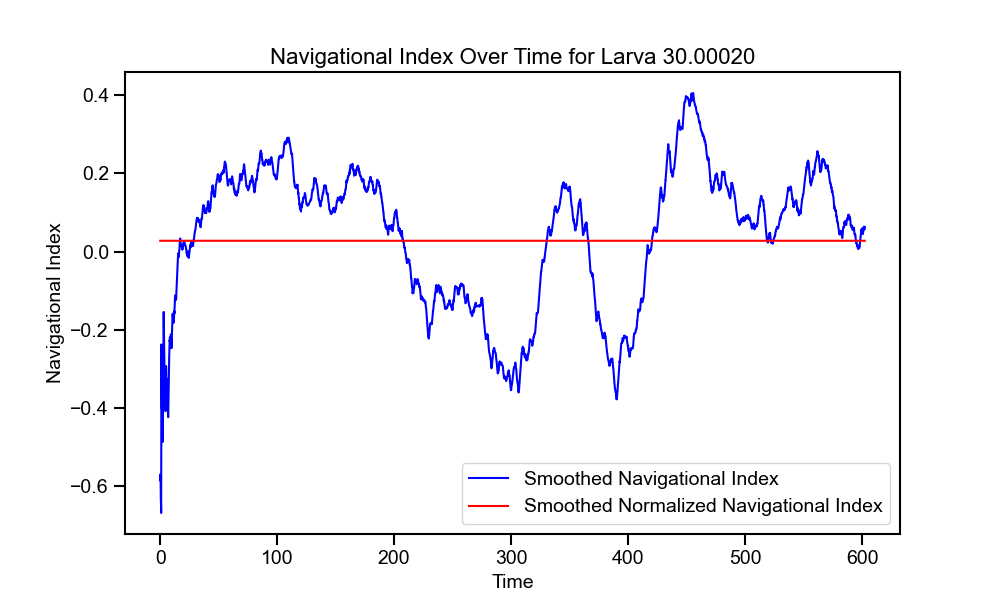

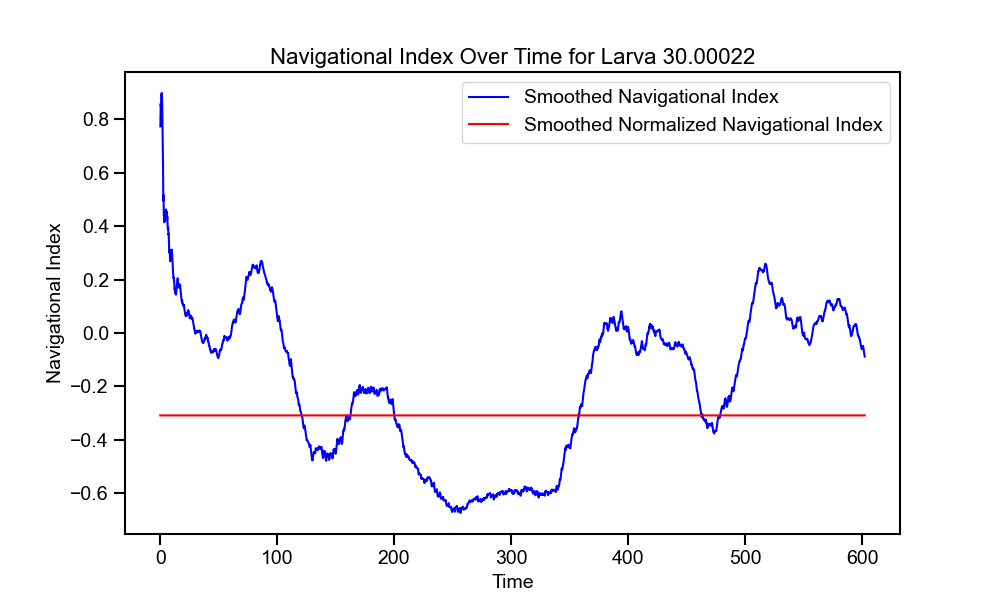

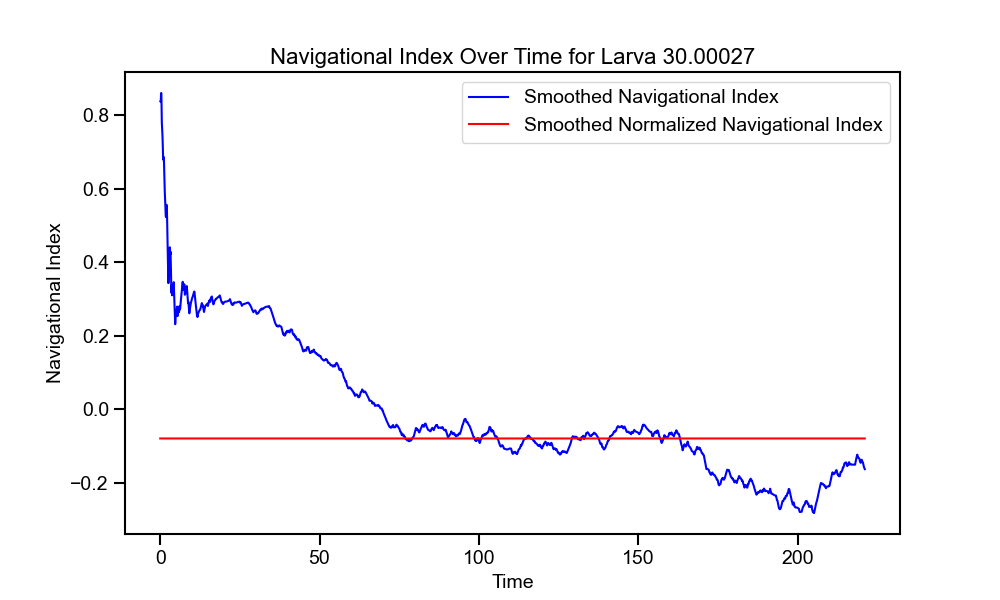

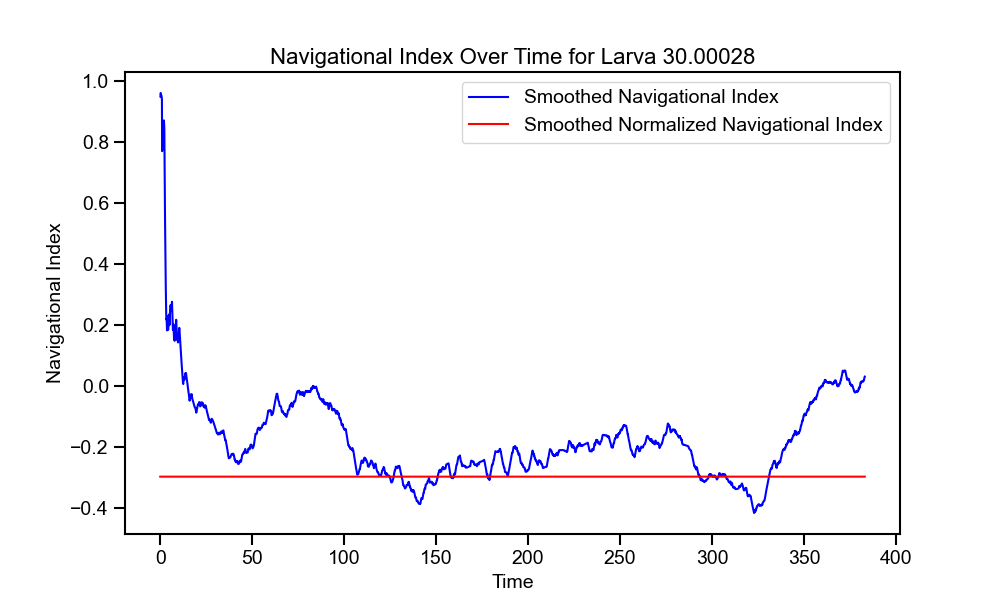

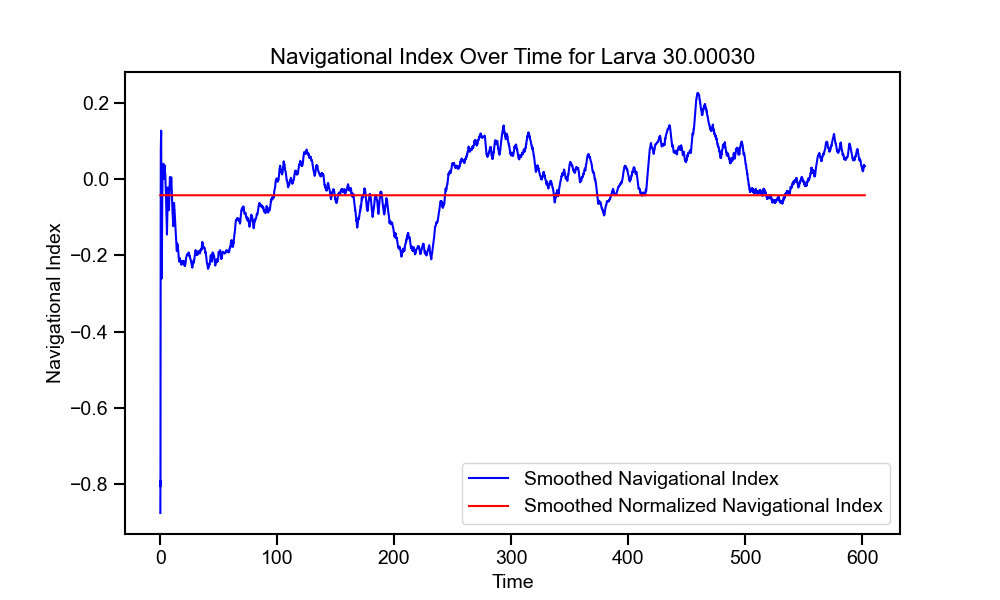

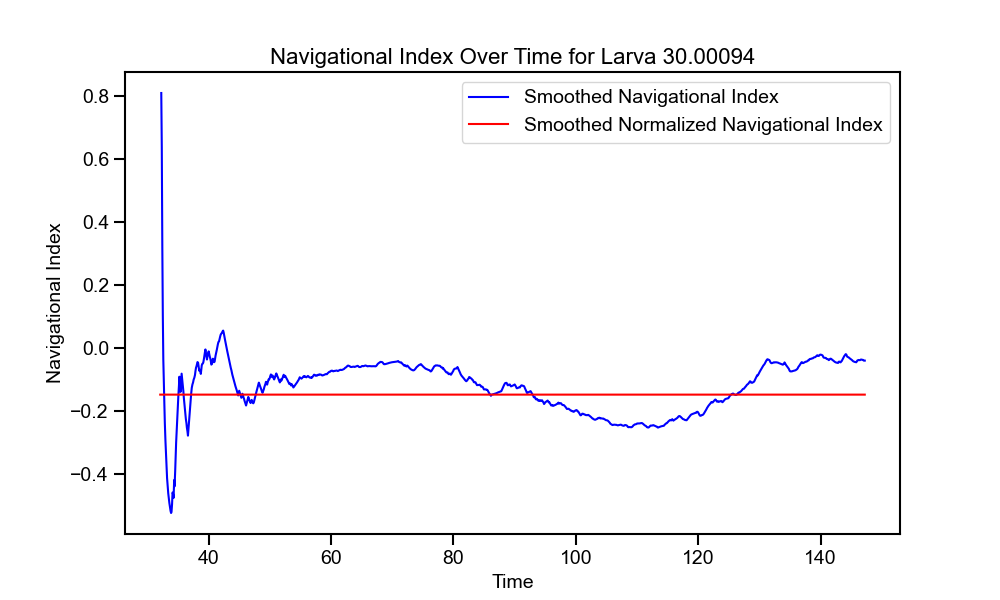

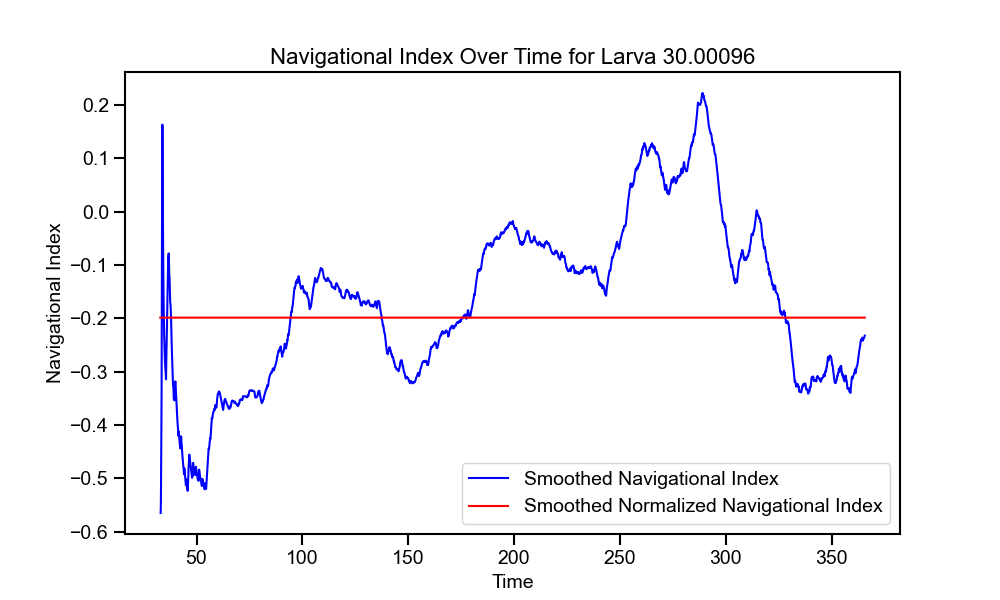

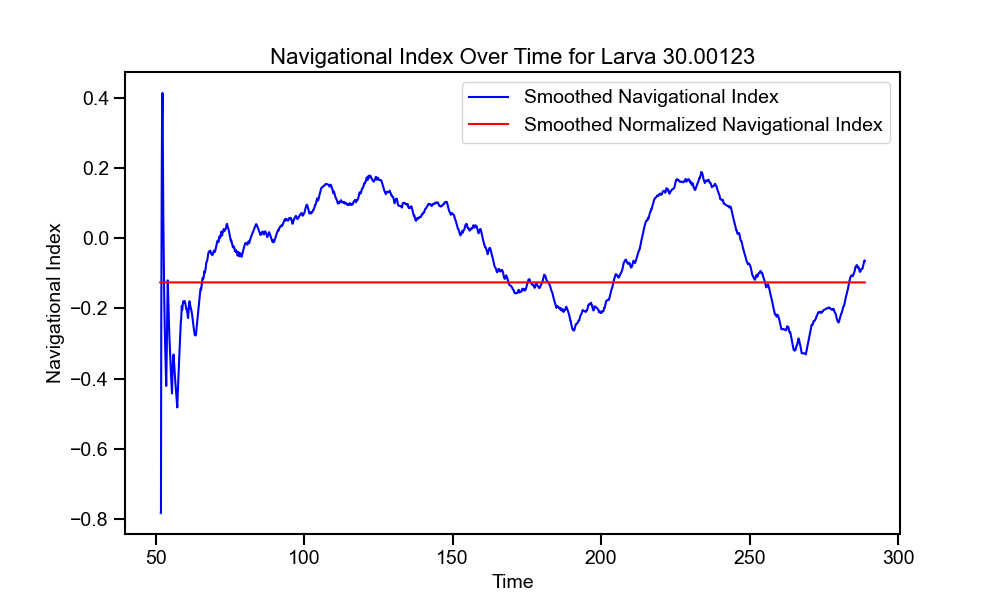

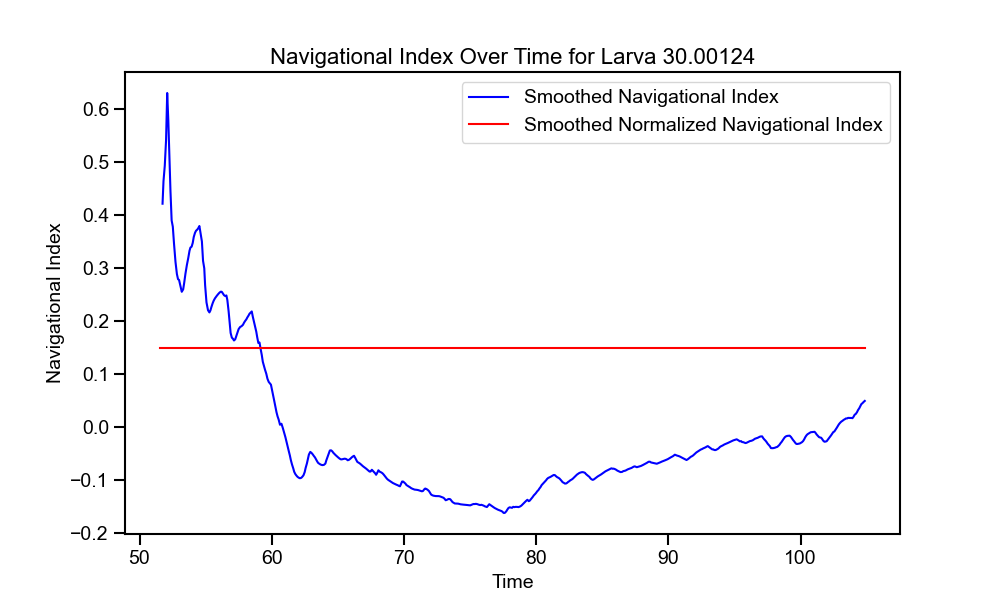

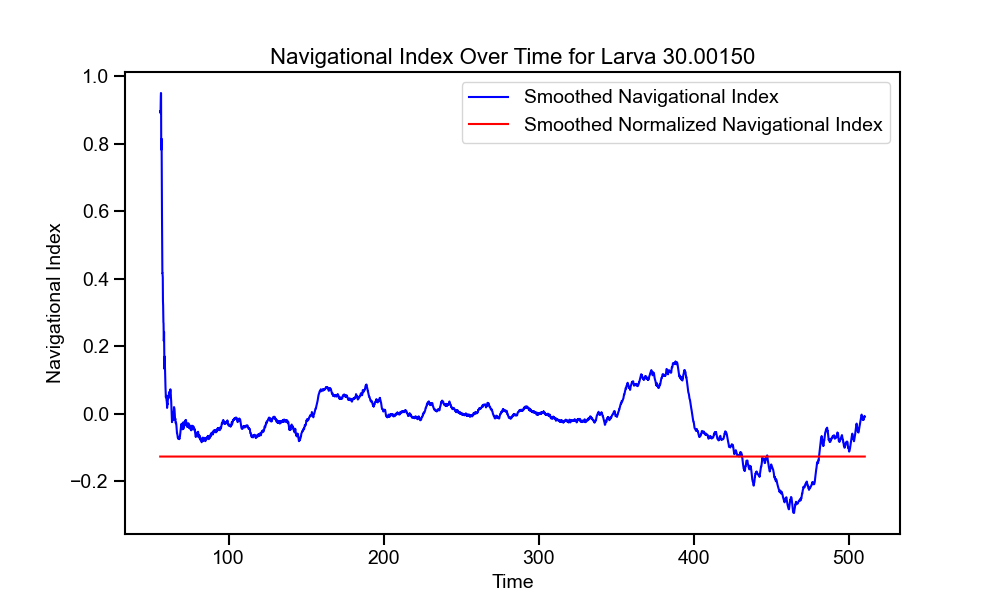

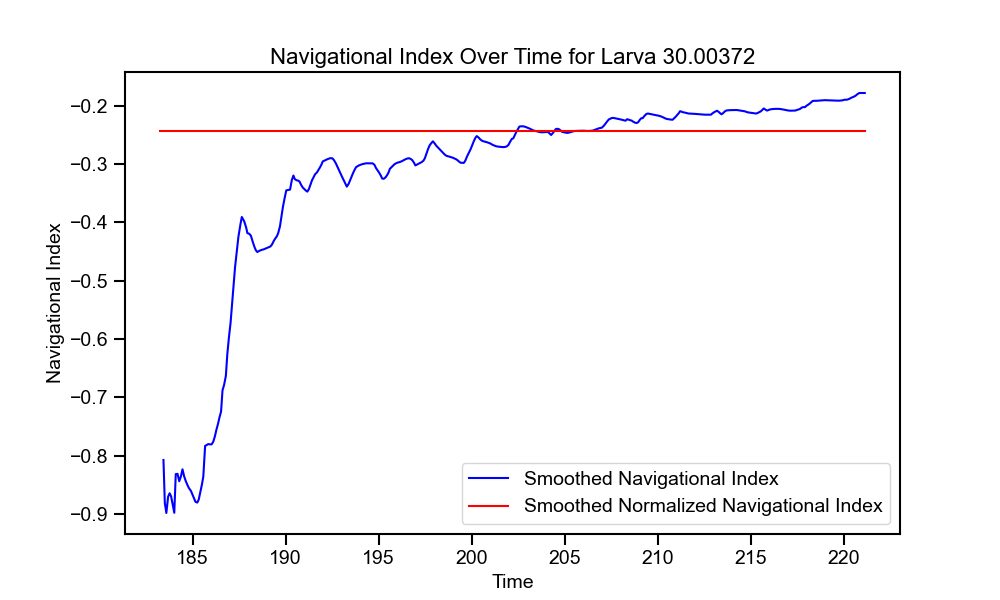

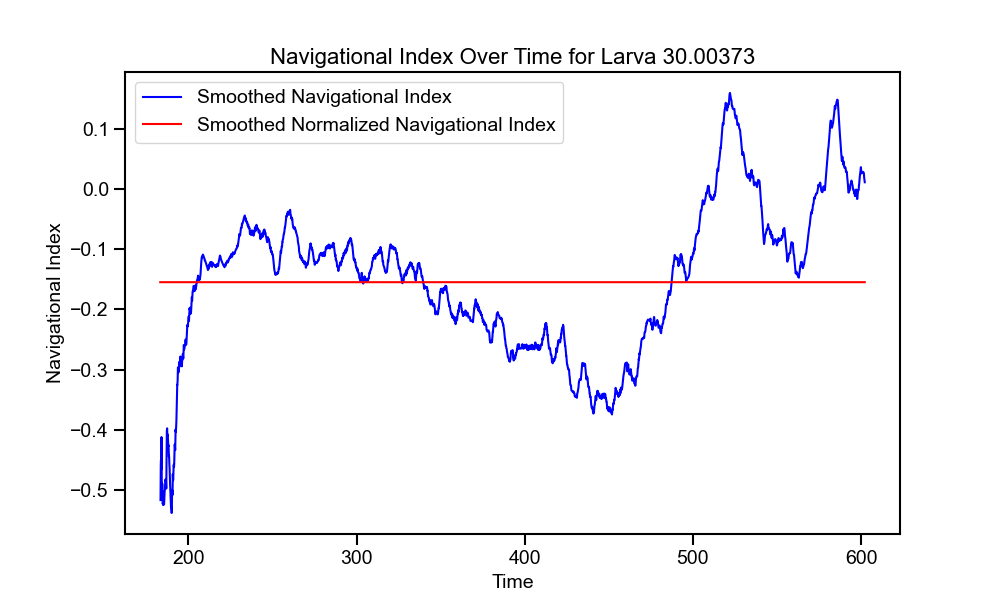

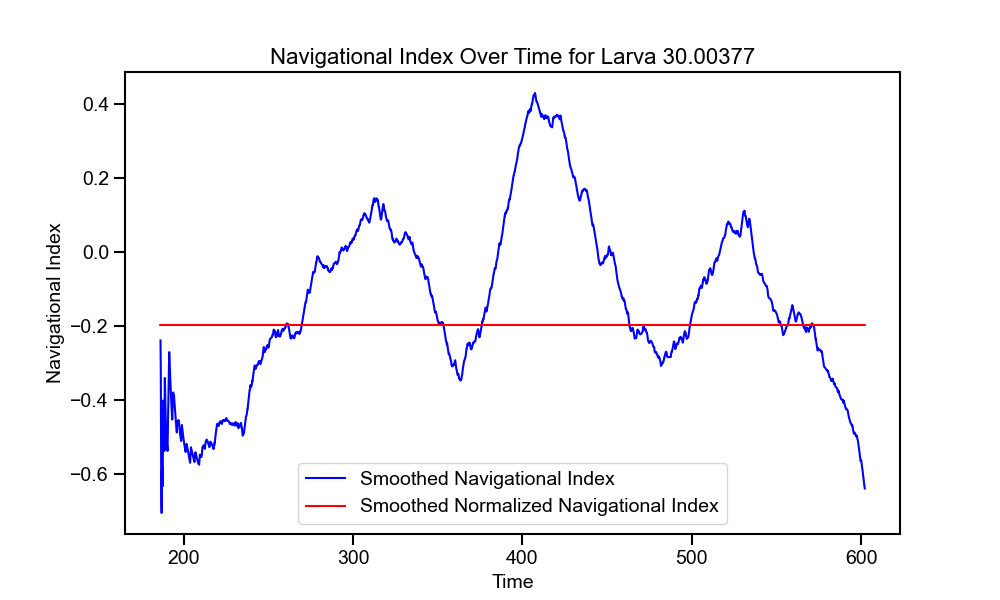

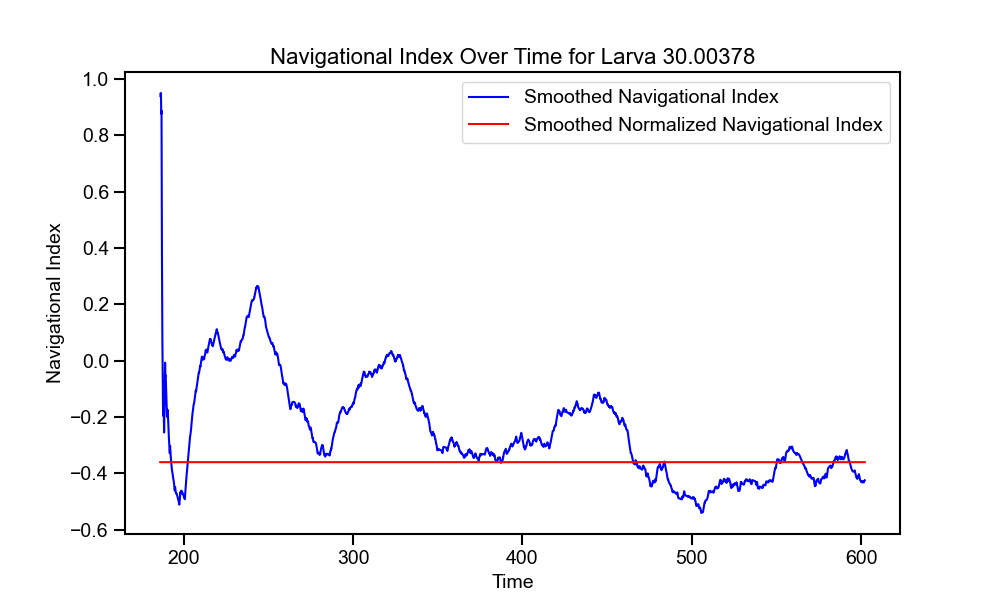

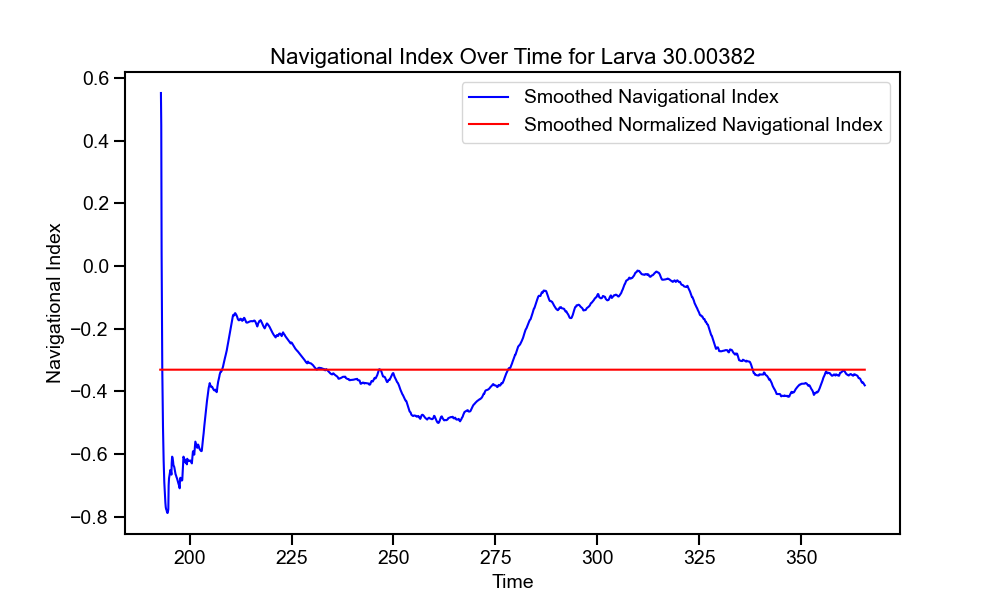

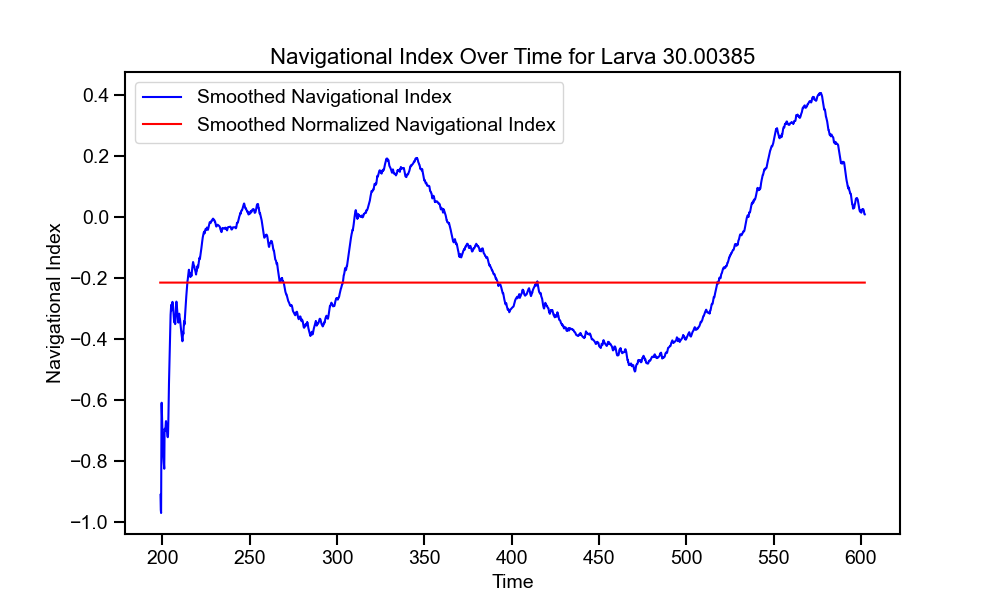

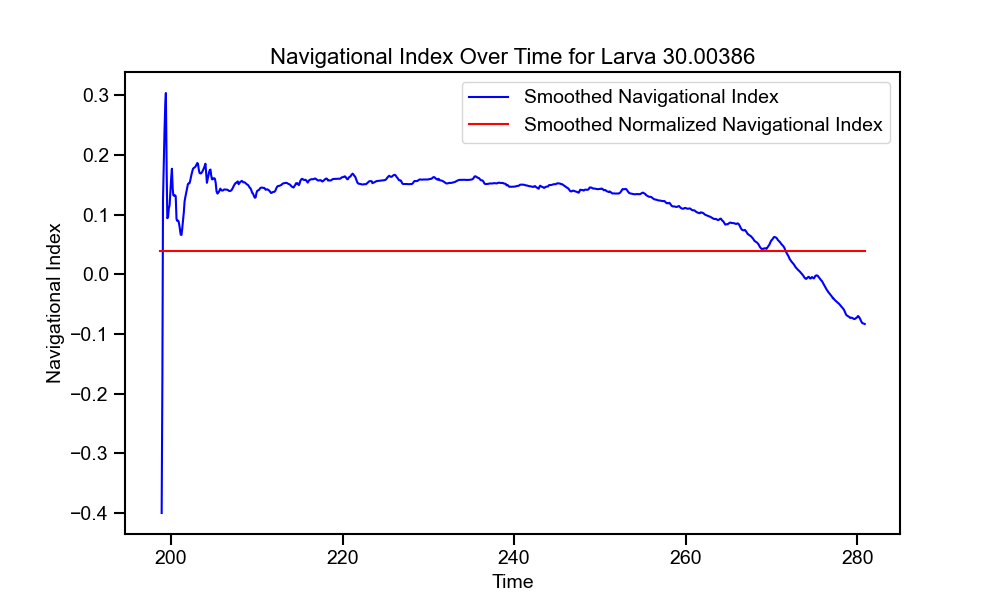

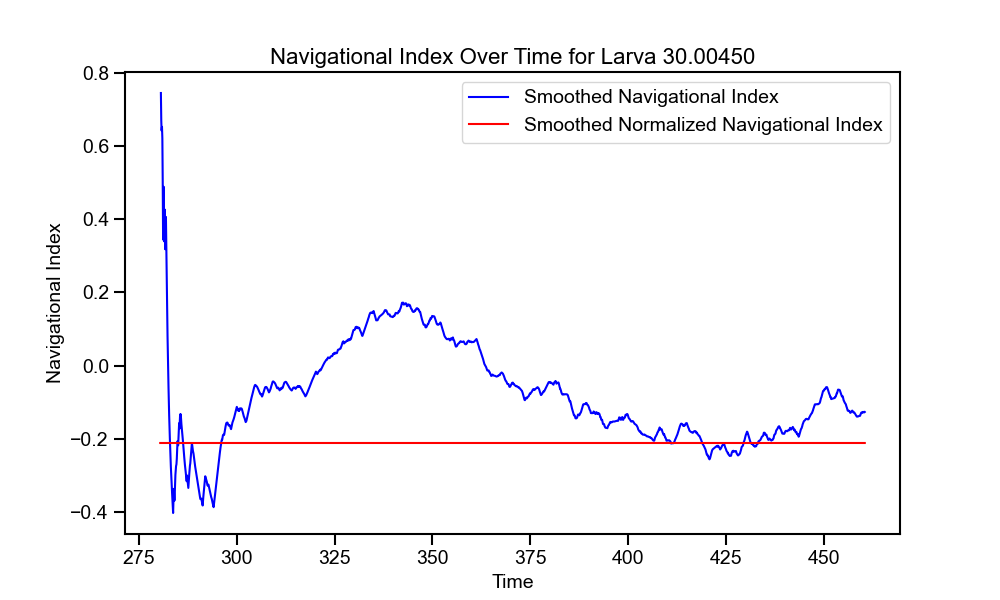

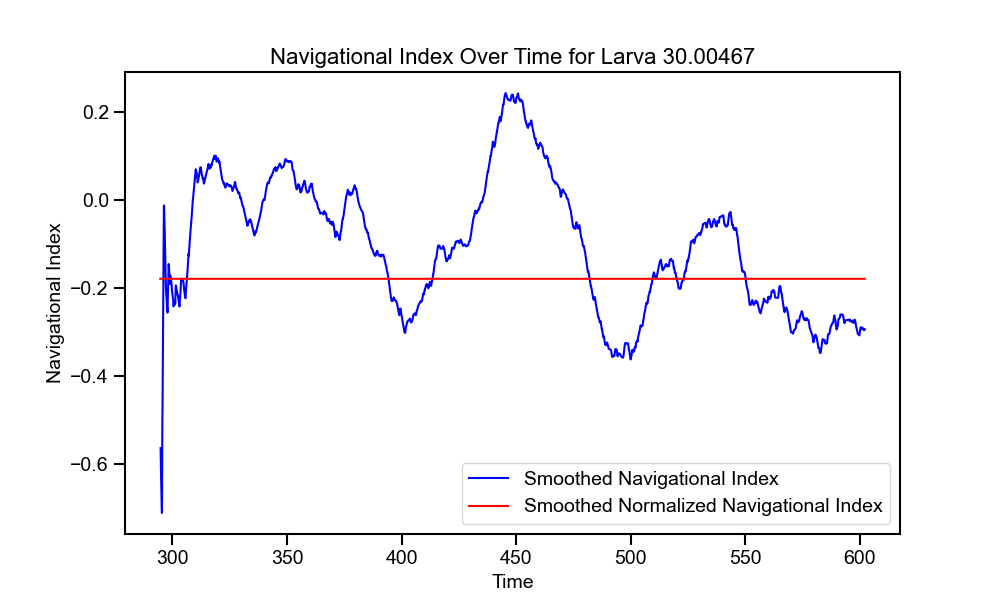

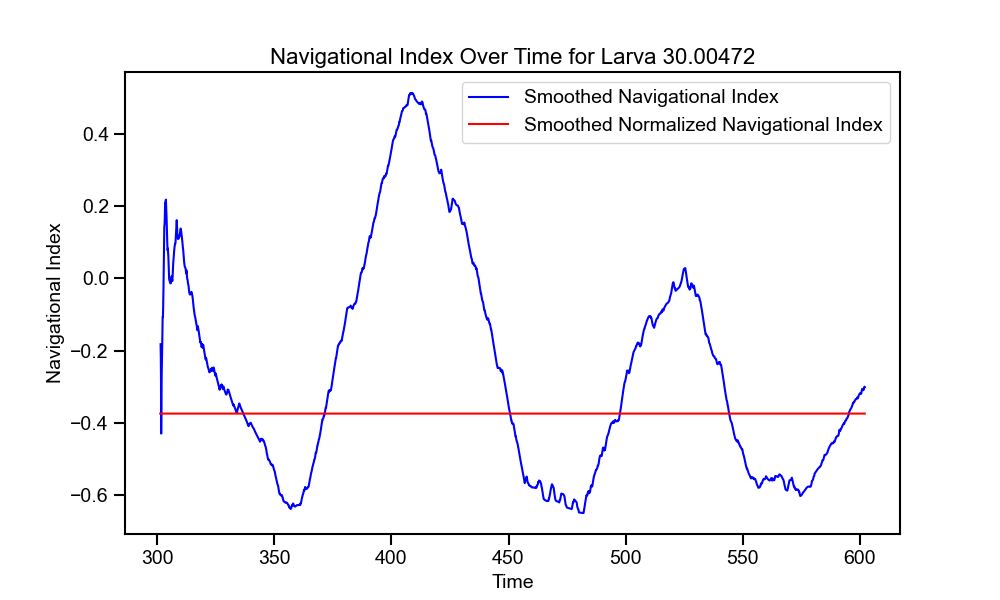

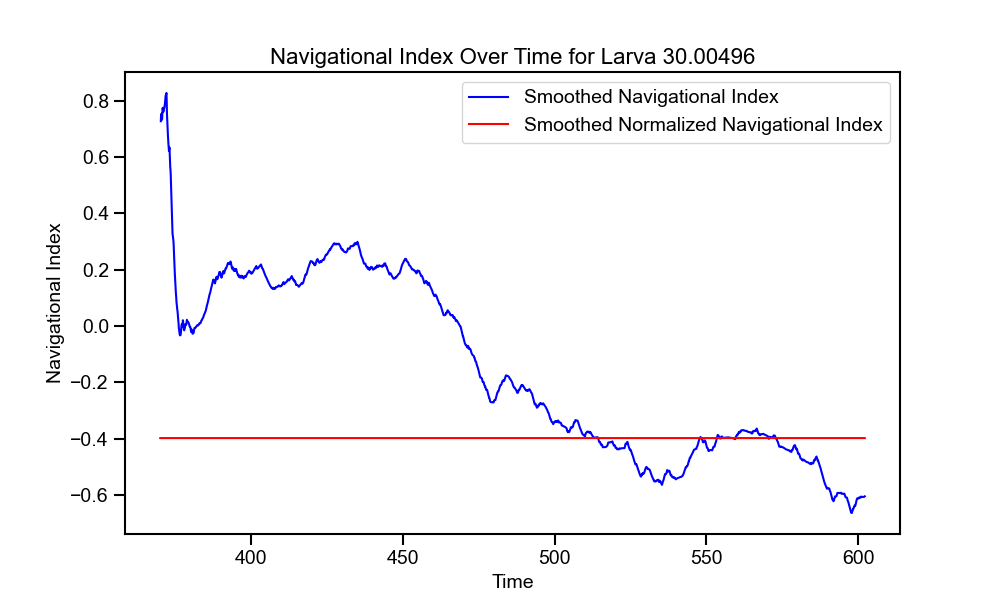

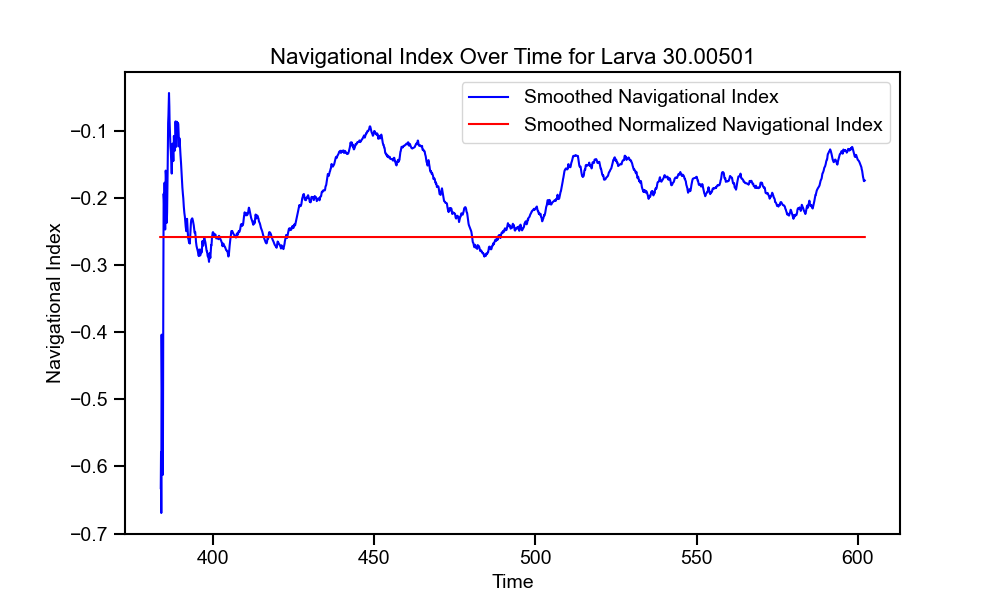

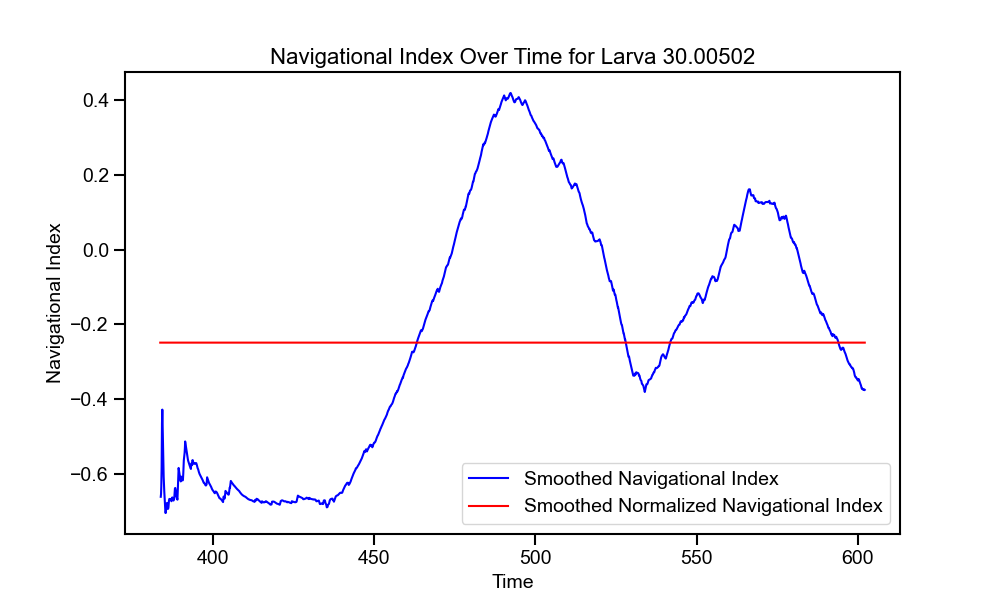

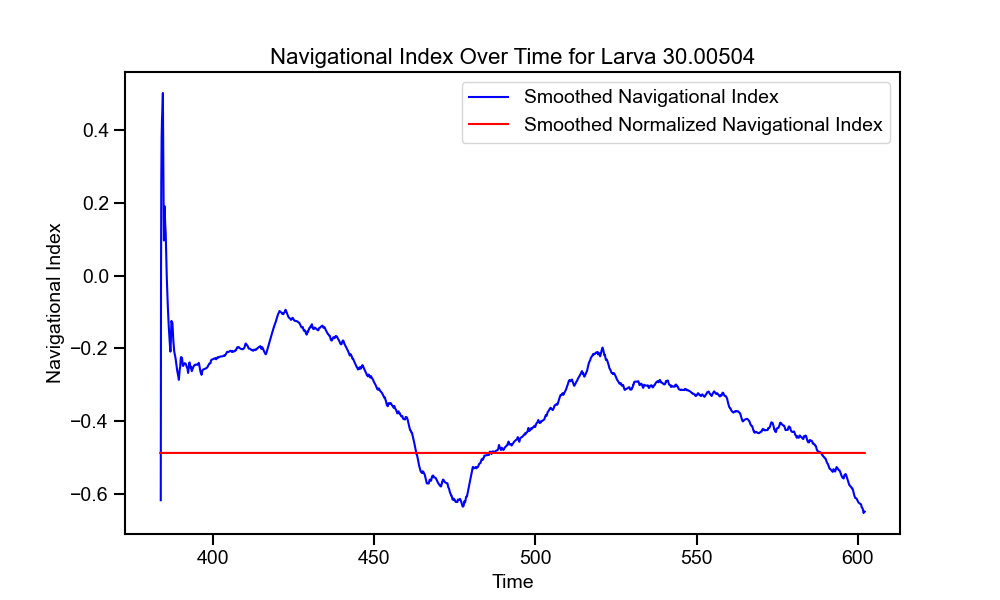

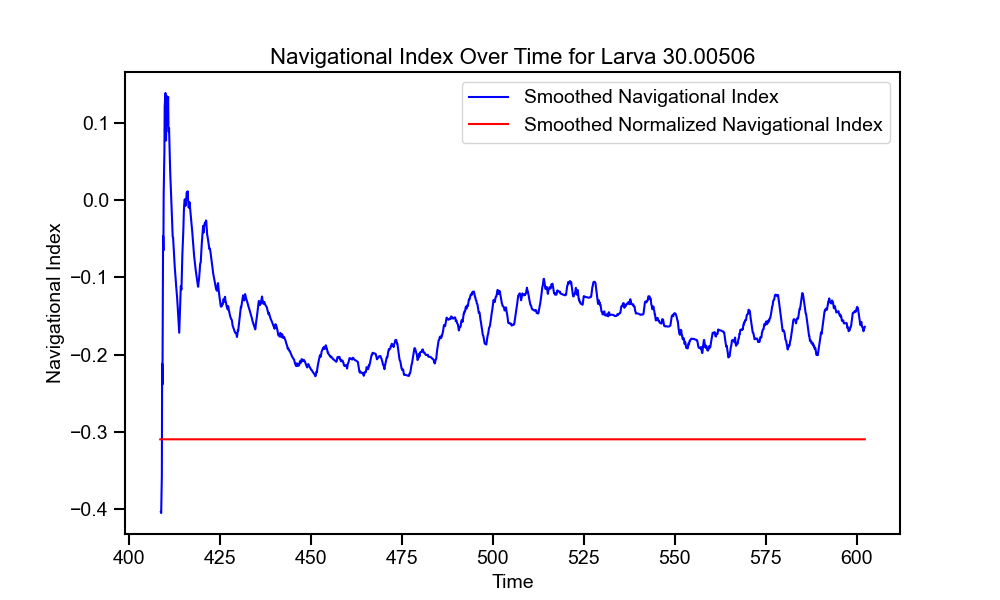

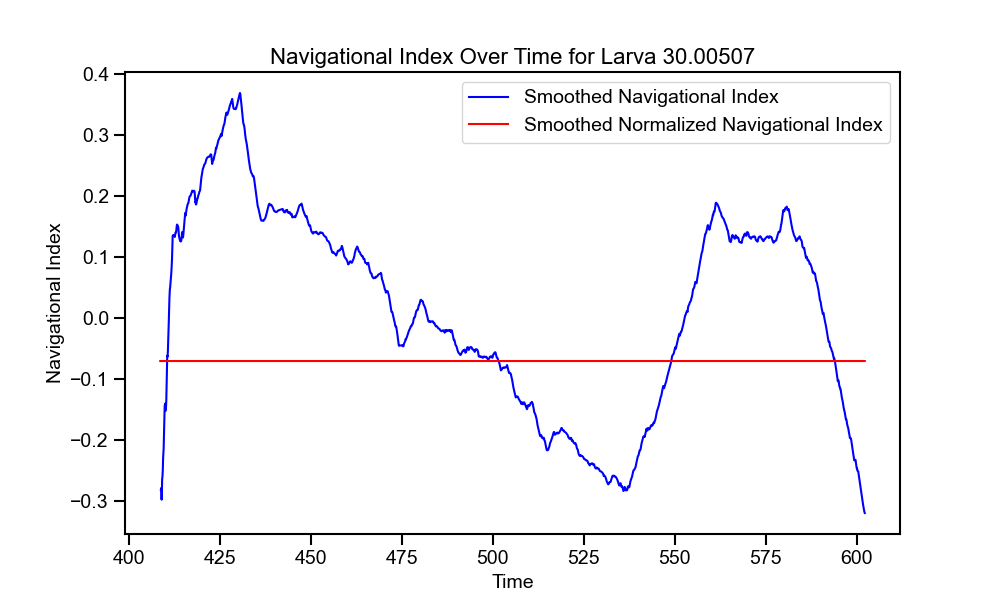

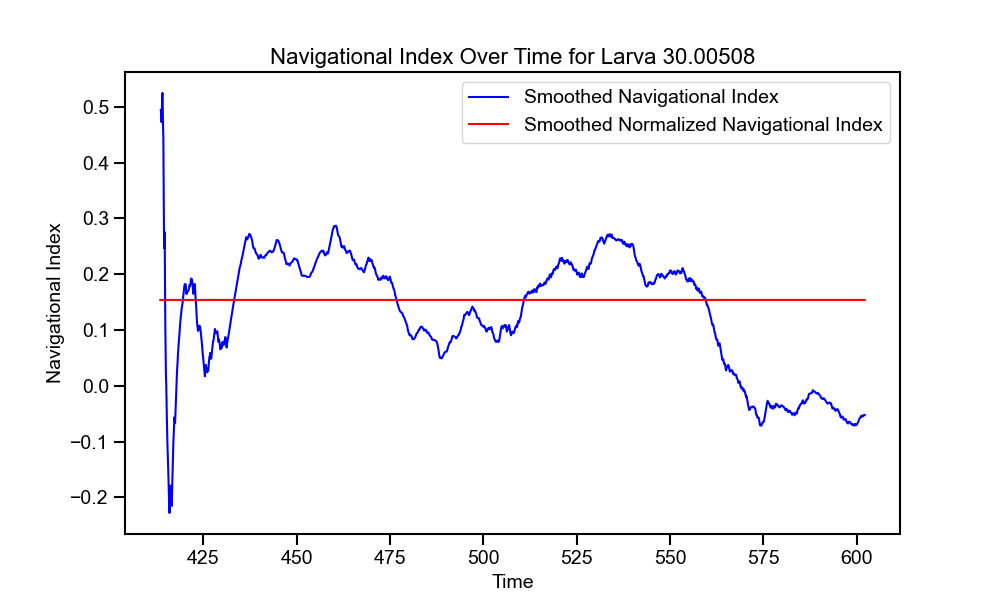

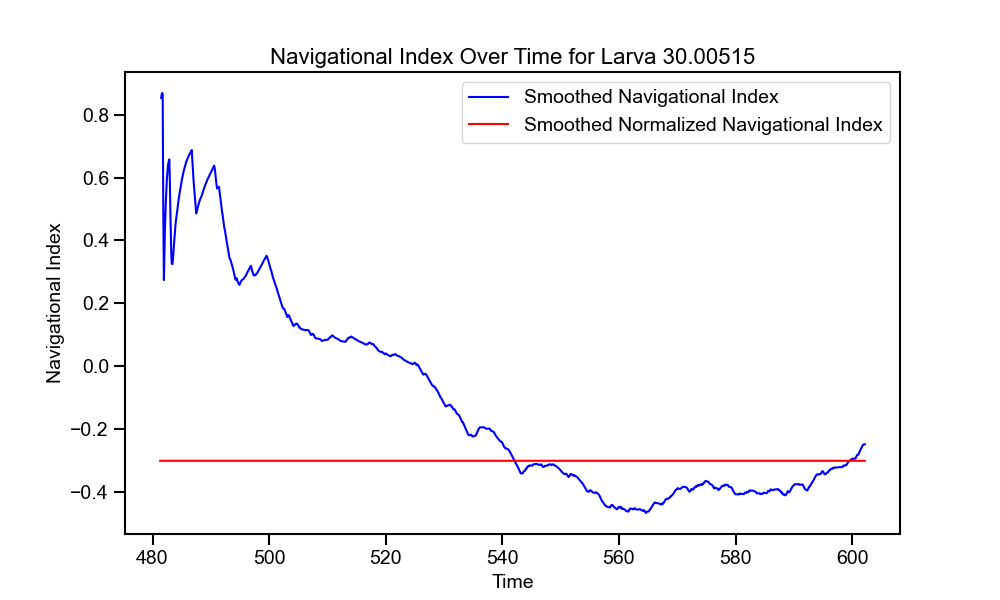

In [93]:
# Plot for all larva IDs in ni_dict with a specified window size
window_size = 500 
for larva_id, ni_df in ni_dict.items():
    anm_plot.plot_navigational_index_time_series_single(ni_df, larva_id, window_size)

/mnt/c/Users/schatterjee/Documents/anemotaxis/src/plot_data.py:260: RuntimeWarning: Mean of empty slice
  plt.ylabel("Navigational Index")
/home/schatterjee/miniconda3/envs/anemotaxis/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


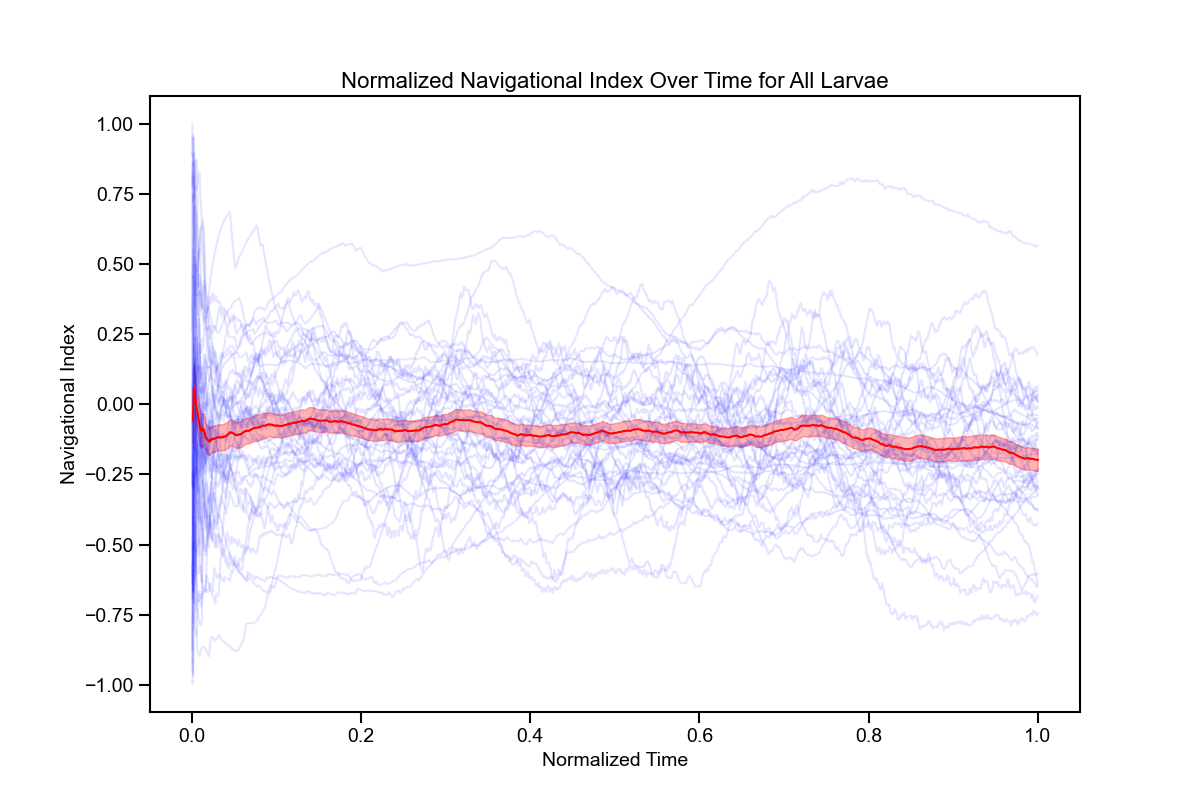

In [90]:
window_size = 500
anm_plot.plot_normalized_navigational_index_time_series(ni_dict, window_size=window_size)

/mnt/c/Users/schatterjee/Documents/anemotaxis/src/plot_data.py:297: RuntimeWarning: Mean of empty slice
/home/schatterjee/miniconda3/envs/anemotaxis/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


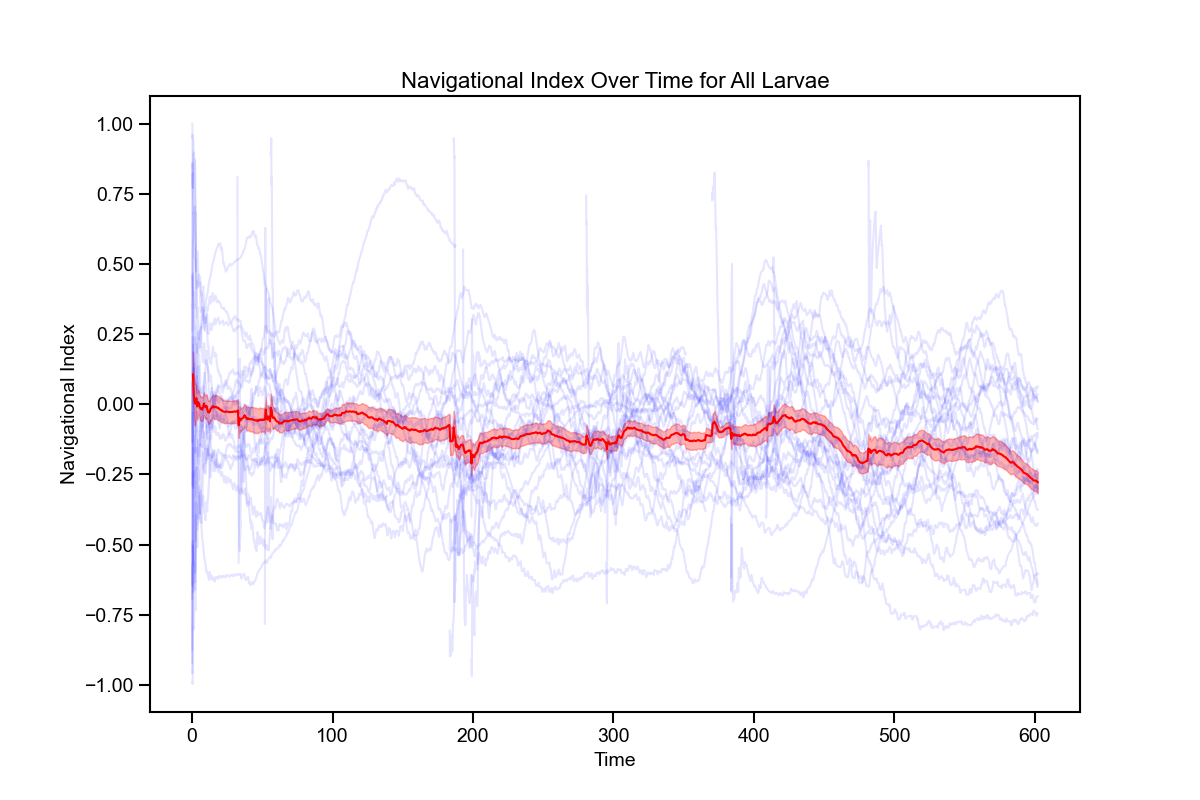

In [94]:
anm_plot.plot_navigational_index_time_series_together(ni_dict, window_size=window_size)

## Working with the tracking data

In [16]:
trx_path = "/mnt/c/Users/schatterjee/Documents/anemotaxis/data/20240219_140808/trx.mat"
# trx_sharbat = anm_parse.import_trx_sharbat(trx_path)
trx_tim = anm_parse.import_trx(trx_path)

59
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{1.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{2.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{3.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{4.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{5.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{6.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{7.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{8.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{9.0}
[[50], [48], [50], [52], [48], [50], [49], [57], [95], [49], [52], [48], [56], [48], [56]]
{11.0}
[[50], [48], [50], [52], [